In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import urllib.request

We use a greyscale image from wikimedia

In [3]:
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/2/2d/Alwac_III_computer%2C_1959.jpg',"Computer.jpg");
img=Image.open("Computer.jpg")
img.show()

We transform it into an array and display its size. The third index is for the color channels, red, green and blue. But since we handle a greyscale image all three channels are identical.

In [4]:
data = np.asarray(img)
print(data.shape)

(470, 650, 3)


We only work with the first layer.

In [5]:
R=data[:,:,0]

We calculate the SVD

In [6]:
U, Sigma, V= np.linalg.svd(R)

Note that numpy stores the diagonal matrix $\Sigma$ as a single row

In [7]:
print(U.shape)
print(Sigma.shape)
print(V.shape)

(470, 470)
(470,)
(650, 650)


We define a variable $d$ that determines how many of the singular values, and hence columns of $U$ and rows of $V$ we want to use for the compressed image.
We display the original red channel and afterwards successively better approximations of it.

In [8]:
Image.fromarray(R).show()
for d in [1,3,5,10,50,75,100]:
    compimg = np.matrix(U[:, :d]) * np.diag(Sigma[:d]) * np.matrix(V[:d, :])
    compRed=Image.fromarray(compimg)
    compRed.show()


We plot the first 20 singular values



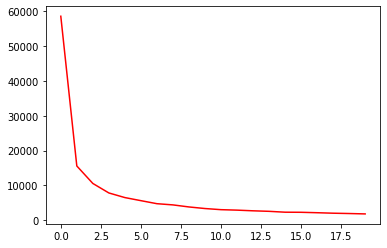

In [9]:
plt.plot(range(20),Sigma[:20], color='red')
plt.show()

The tone of a single pixel is defined by a number between 0 and 255, or 8 bits = 1 byte. We can calculate the storage requirements for the original image and the approximations for different values of $d$.

In [10]:
R.size*R.itemsize

305500

In [11]:
for d in [1,3,5,10,50,75,100]:
    print(d, U[:d,:].size*U.itemsize+Sigma[:d].size+ V[:,:d].size*V.itemsize)

1 8961
3 26883
5 44805
10 89610
50 448050
75 672075
100 896100


We see that the 'compression' via the SVD actually needs more space for reasonable image quality.
Can you explain why?

We will look at a different example that compares more favorable

In [12]:
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/b/bc/The_Moon_Luc_Viatour.jpg',"Moon.jpg");
img=Image.open("Moon.jpg")
img.show()
moon = np.asarray(img)
print(moon.shape)
U, Sigma, V= np.linalg.svd(moon)

(1804, 1365)


In [13]:
Image.fromarray(moon).show()
for d in [1,3,5,10,50,75,100]:
    compimg = np.matrix(U[:, :d]) * np.diag(Sigma[:d]) * np.matrix(V[:d, :])
    compRed=Image.fromarray(compimg)
    compRed.show()

In [14]:
print(moon.size*moon.itemsize)
for d in [1,3,5,10,50,75,100]:
    print(d, U[:d,:].size*U.itemsize+Sigma[:d].size+ V[:,:d].size*V.itemsize)

2462460
1 25353
3 76059
5 126765
10 253530
50 1267650
75 1901475
100 2535300


Why is the compression working better here?